# DSCI 100 Project Individual Planning Report

- Name: Jessie Chen
- Section: 009
- Group: 6

In [6]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

## (1) Data Description

In [7]:
# LOAD PLAYERS AND SESSIONS INTO R
players <- read_csv("https://raw.githubusercontent.com/NormaeAndCircini/dsci-100-project/refs/heads/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/NormaeAndCircini/dsci-100-project/refs/heads/main/data/sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [8]:
# PLAYERS SUMMARY STATISTICS
summary_players <- summary(players)
catagories_experience <- unique(players$experience)
catagories_gender <- unique(players$gender)

summary_players
catagories_experience
catagories_gender

# SESSIONS SUMMARY STATISTICS
summary_sessions <- summary(sessions)

summary_sessions

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

[1] "Male"              "Female"            "Non-binary"       
[4] "Prefer not to say" "Agender"           "Two-Spirited"     
[7] "Other"

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

The data consist of two file: `players.csv` and `sessions.csv`. 

`players.csv` is a list of all unique players, including data about each player. There are
- 196 rows (observations)
- 7 variables
  | variable  | type | meaning |
  |-----------|------|---------|
  | experience | character | experience level of a player in MineCraft, which has 5 catagories, 'Pro', 'Veteran', 'Amateur', 'Regular', and'Beginner' |
  | subscribe | logical | true if a player subscribes to a game-related newsletter |
  | hashedEmail | character | hashed or encrypted email address of a player |
  | played_hours | double | the time (in hours) a player has played MineCraft |
  | name | character | name of a player |
  | gender | character | gender of a player, which has 7 catagories, 'Male', 'Female', 'Non-binary', 'Prefer not to say', 'Agender', 'Two-Spirited', and 'Other' |
  | Age | double | the age of a player in years |

  | double variable | units | minimum | maximum | mean | first quarter | third quarter |
  |----------------|-----|-------|----------|--------|--------------|--------|
  | played_hours | hours | 0 | 223.10 | 5.85 | 0 | 0.60 |
  | Age | years | 9.00 | 58.00 | 21.14 | 17.00 | 22.75 |
- Issues: 2 NA's in `Age`
- Potential issues: `experience` seems self-reported, this might result in a weak correlation with other variables, we also do not know what qualifications each level has.

`sessions.csv` is a list of individual play sessions by each player, including data about the session. There are
- 1535 rows (observations)
- 5 variables
  | variable  | type | meaning |
  |-----------|------|---------|
  | hashedEmail | character | hashed or encrypted email address of a player of the session |
  | start_time | character | the start time and date of a session |
  | end_time | character | the end time and date of a session |
  | original_start_time | double | the start time of a session recorded in UNIX time (milliseconds) |
  | original_end_time | double | the end time of a session recorded in UNIX time (milliseconds) |
- Issues: 2 NA's in `original_end_time`
- Potential issues: `start_time` and `end_time` consist of 2 pieces of information, date and time, not tidy

`players.csv` and `sessions.csv` data were collected in the PLAICraft Minecraft browser window, the research team record players' gameplay, speech, and key presses.

## (2) Questions

I will address the first broad question, *Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?*

The specific question that I have formulated: Can `played_hours` and `Age` predict `subscribe` in `players.csv`?

The data will help me address the specific question because it has information about each player. I only need `players.csv`, and it is tidy as it fullfilled the 3 requirements of tidy data. I can apply the predictive method of K-nearest neighbors classification.

## (3) Exploratory Data Analysis and Visualization

See (1) Data Description that the dataset can be loaded into R. I only need `players.csv`, and it is already in a tidy format, there is no more wrangling I need to perform at this step.

In [9]:
# CALCULATE MEAN VALUE FOR EACH QUANTITATIVE VARIABLE IN THE PLAYERS.CSV
players_mean <- players |>
    summarize(played_hours = mean(played_hours, na.rm = TRUE), 
              age = mean(Age, na.rm = TRUE))
players_mean

played_hours,age
<dbl>,<dbl>
5.845918,21.13918


The mean value for each quantitative variable in the `players.csv` data set (i.e., `played_hours` and `Age`).
| mean played hours (in hours) | mean age (in years) |
|-------------------|----------|
| 5.85 | 21.14 |

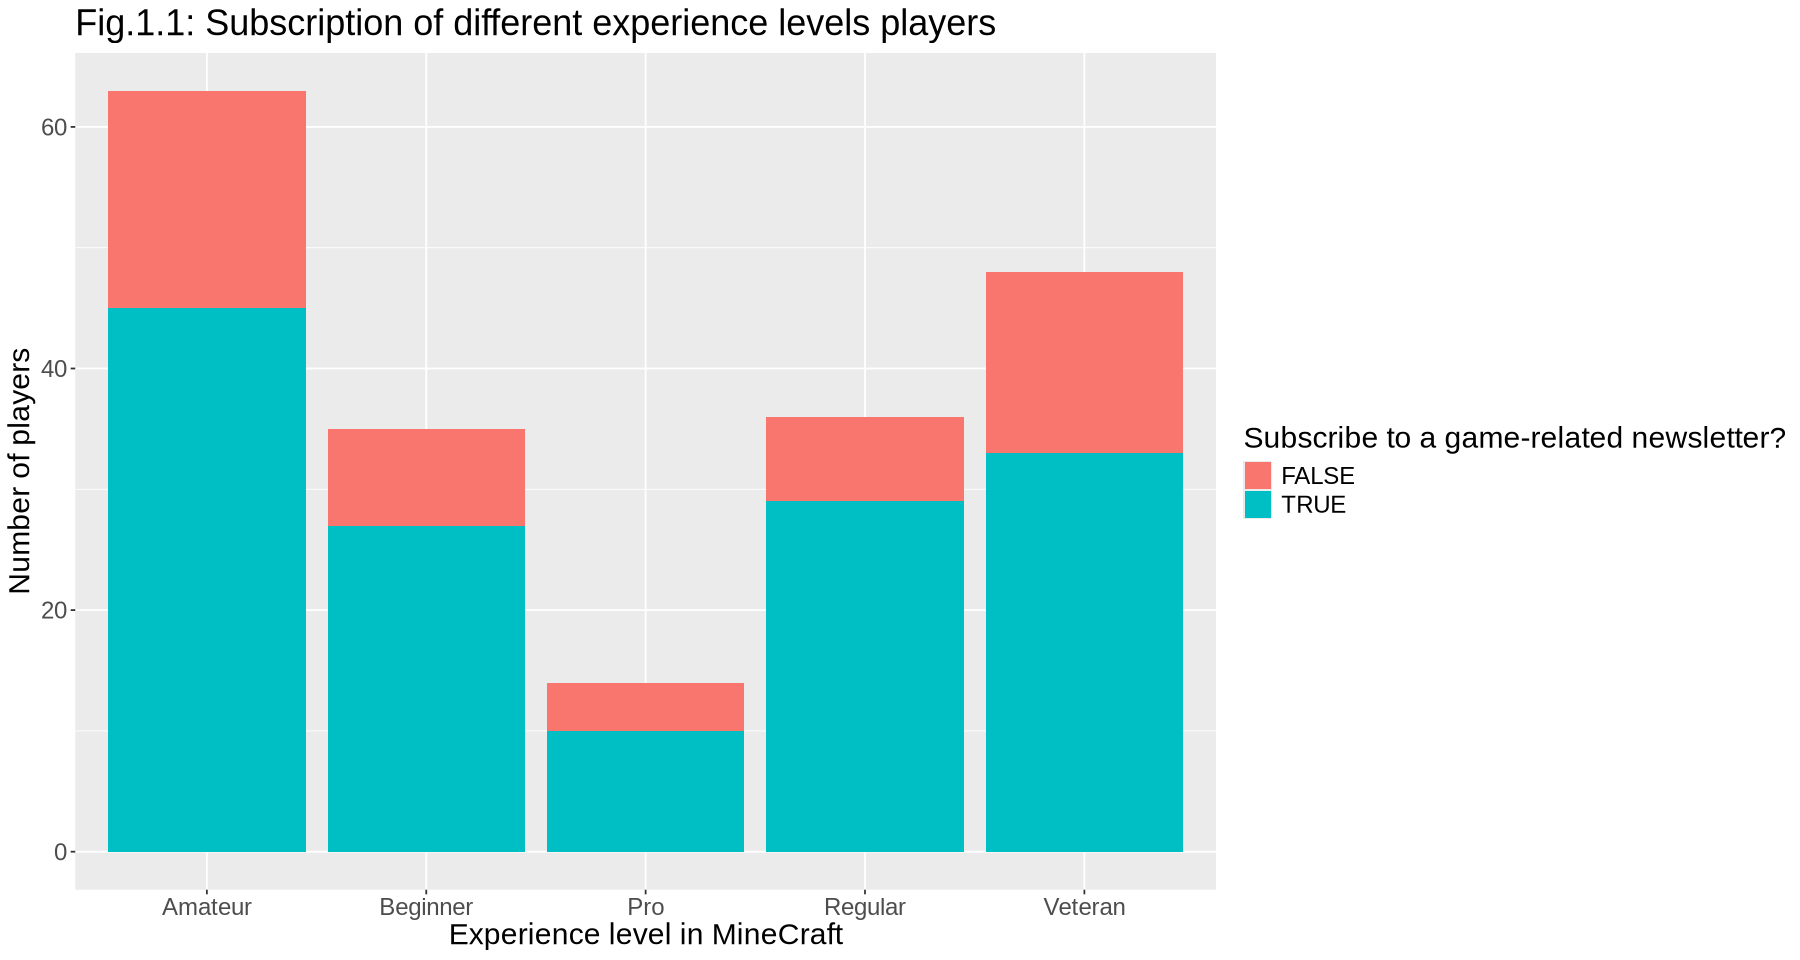

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


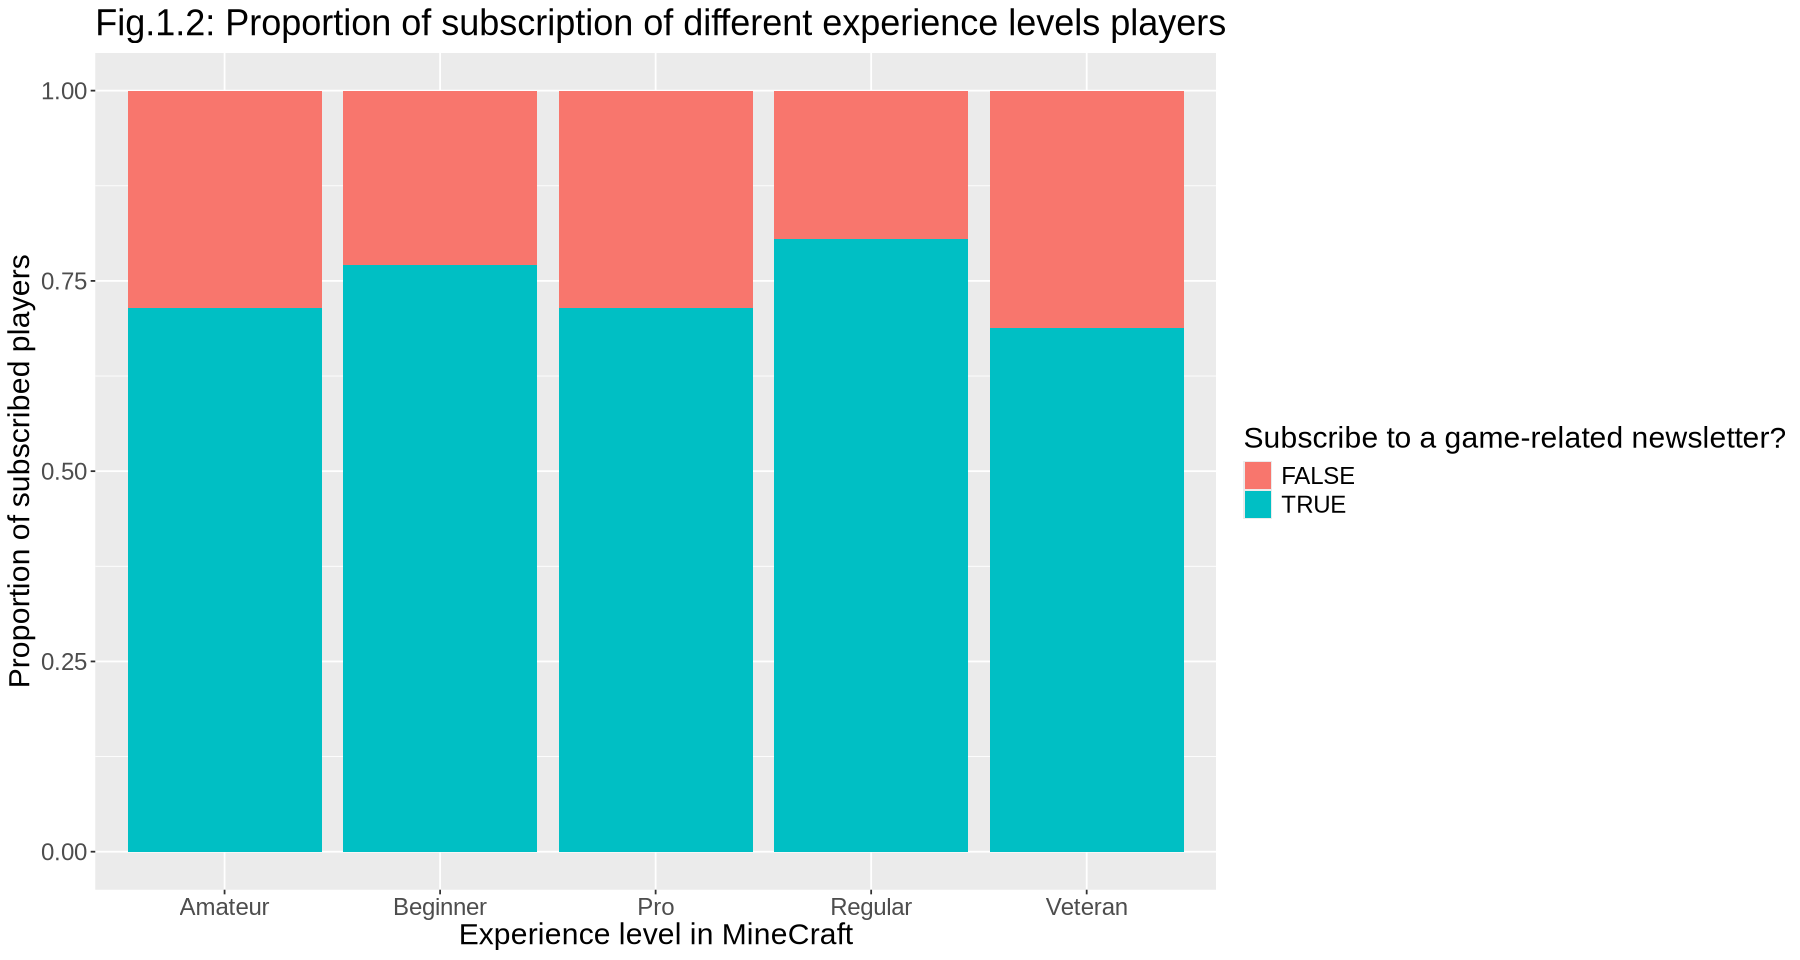

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


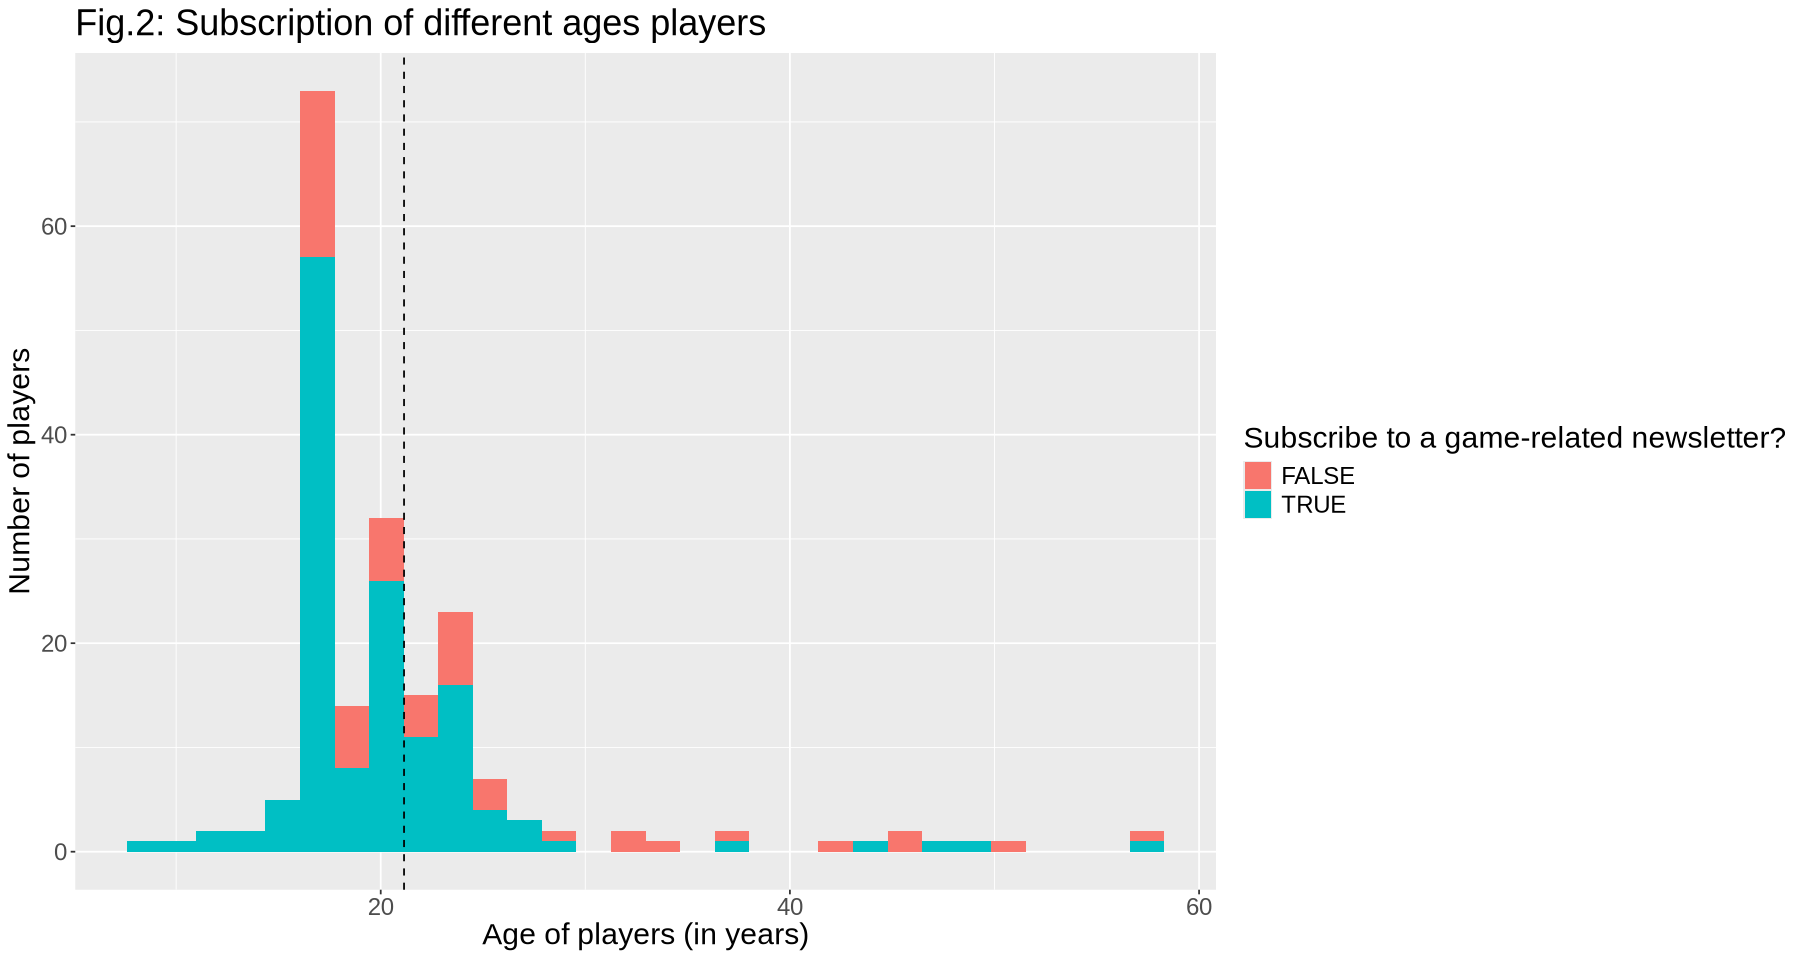

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


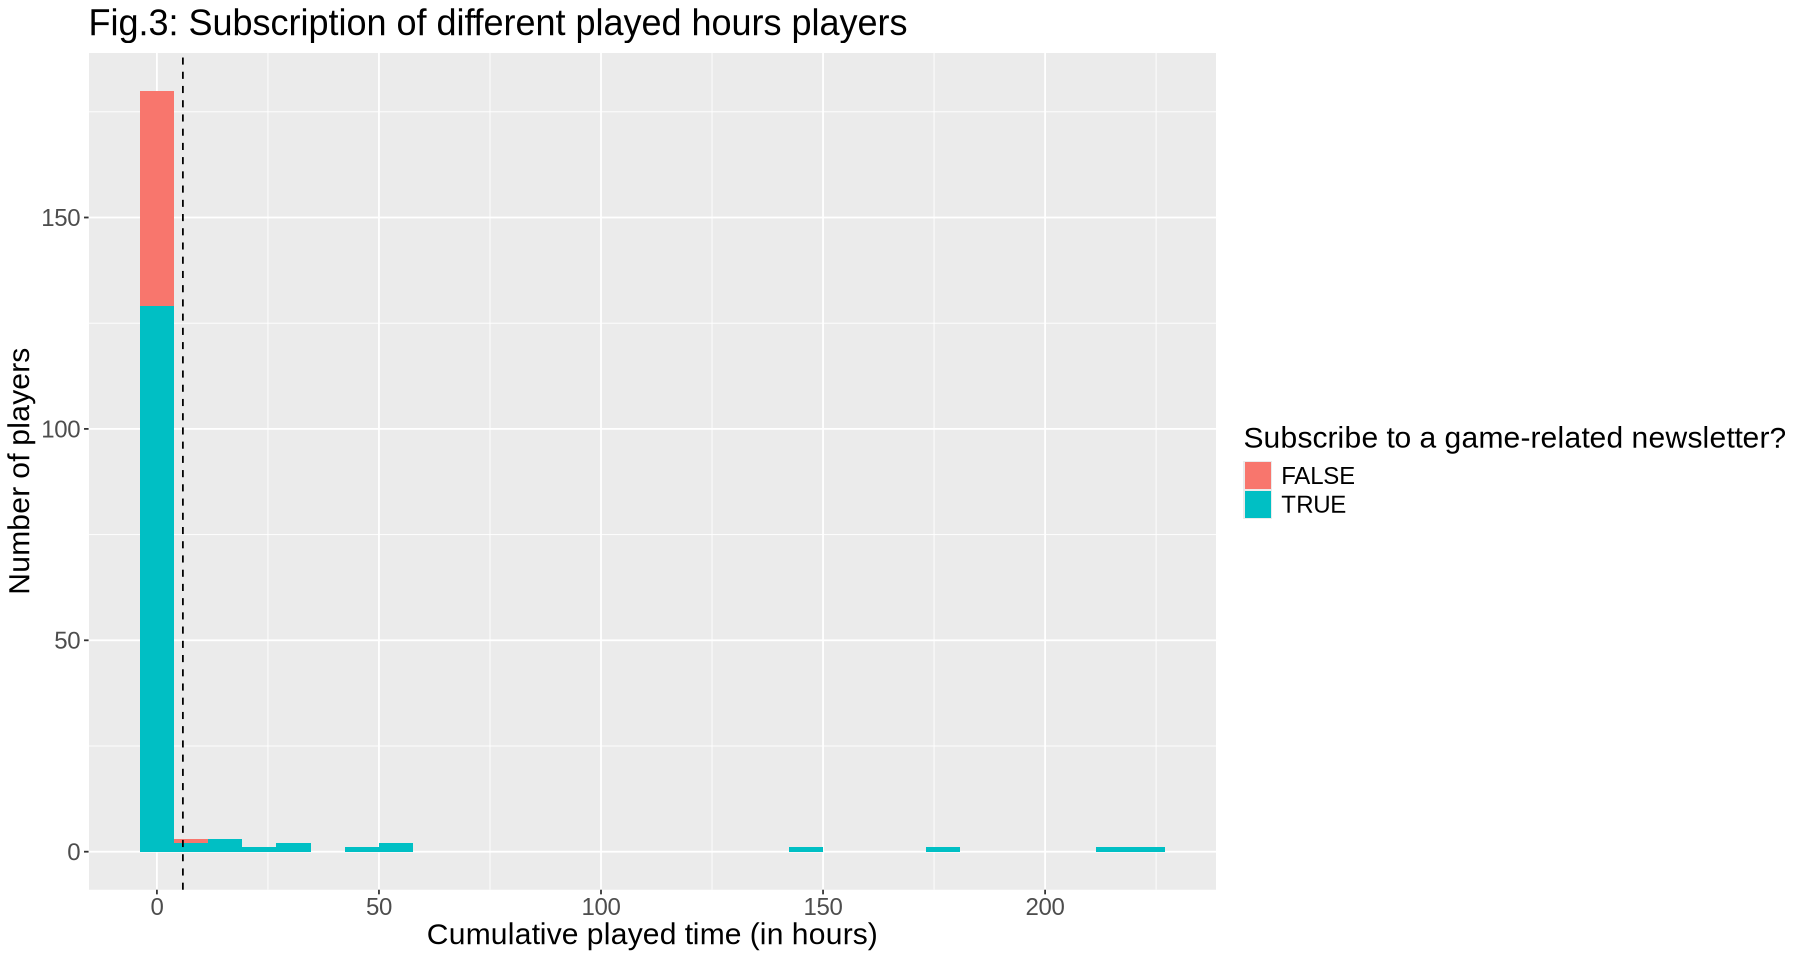

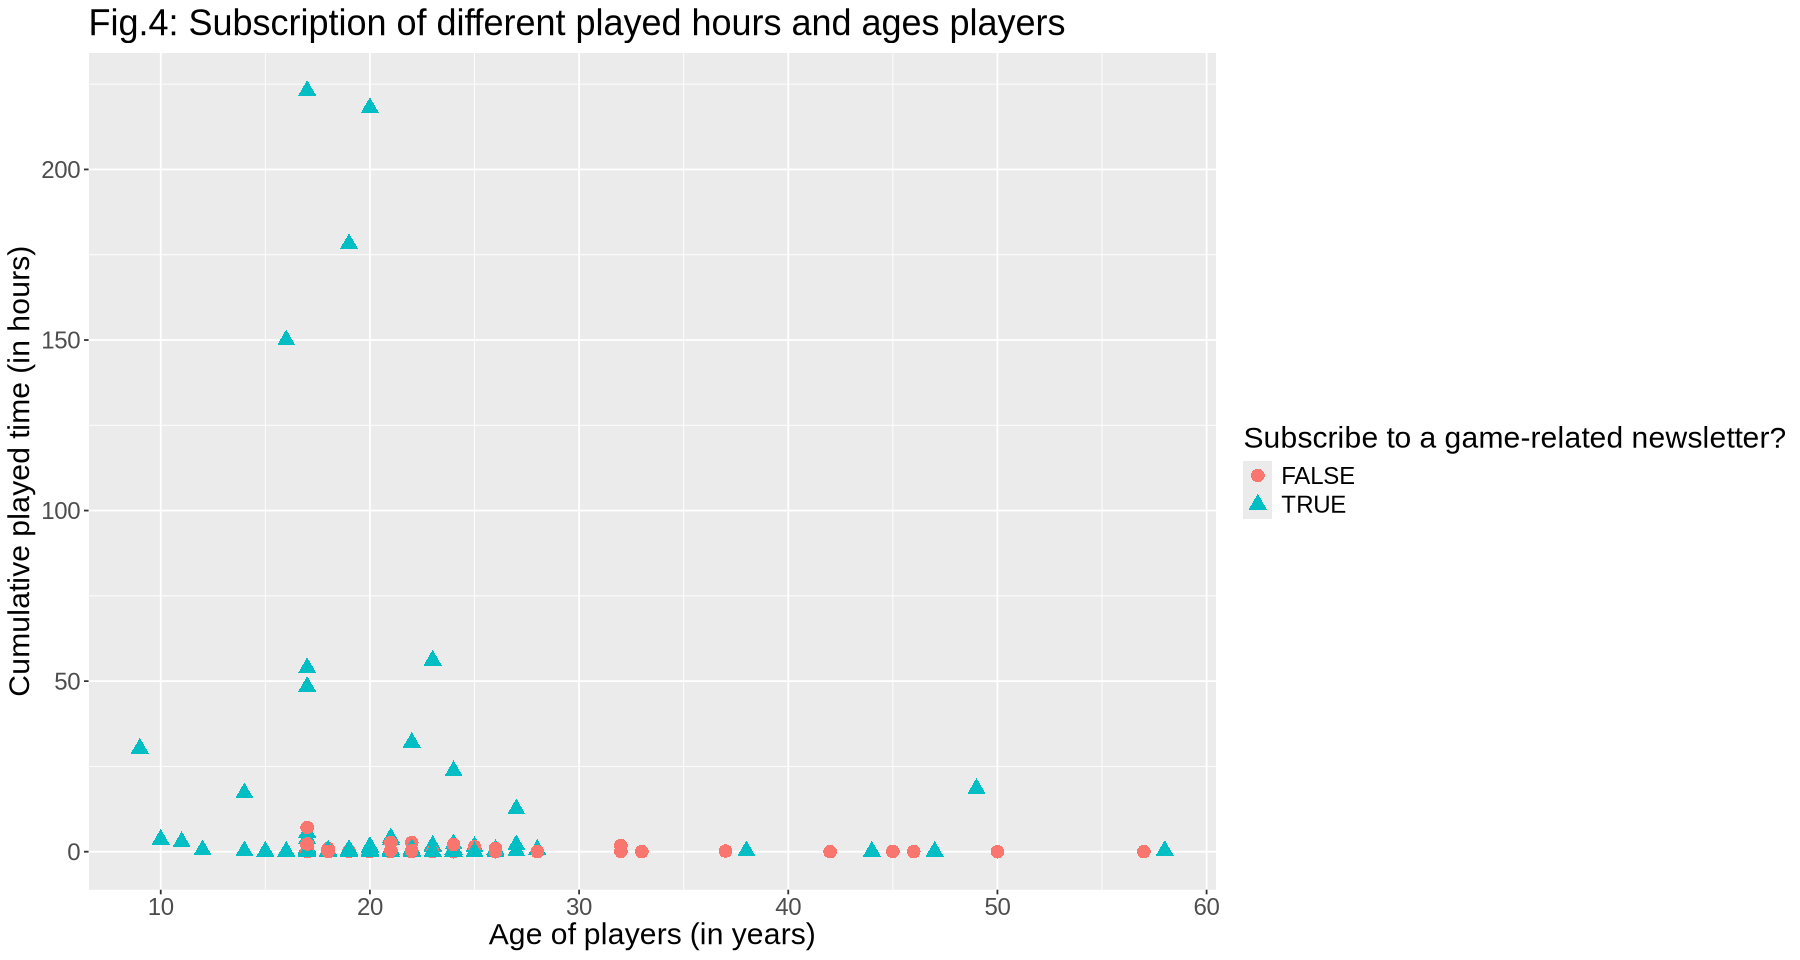

In [10]:
# EXPLORATORY VISUALIZATIONS OF THE DATA
options(repr.plot.width = 15, repr.plot.height = 8)

subscribe_experience_plot <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar() +
    labs(x = "Experience level in MineCraft",
         y = "Number of players",
         fill = "Subscribe to a game-related newsletter?",
         title = "Fig.1.1: Subscription of different experience levels players") +
    theme(text = element_text(size = 18))

subscribe_experience_proportion_plot <- players |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = 'fill') +
    labs(x = "Experience level in MineCraft",
         y = "Proportion of subscribed players",
         fill = "Subscribe to a game-related newsletter?",
         title = "Fig.1.2: Proportion of subscription of different experience levels players") +
    theme(text = element_text(size = 18))

subscribe_age_plot <- players |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram() +
    geom_vline(xintercept = 21.14, linetype = "dashed") +
    labs(x = "Age of players (in years)",
         y = "Number of players",
         fill = "Subscribe to a game-related newsletter?",
         title = "Fig.2: Subscription of different ages players") +
    theme(text = element_text(size = 18))

subscribe_played_hours_plot <- players |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram() +
    geom_vline(xintercept = 5.85, linetype = "dashed") +
    labs(x = "Cumulative played time (in hours)",
         y = "Number of players",
         fill = "Subscribe to a game-related newsletter?",
         title = "Fig.3: Subscription of different played hours players") +
    theme(text = element_text(size = 18))

subscribe_played_hours_age_plot <- players |>
    ggplot(aes(x = Age, 
               y = played_hours,
               color = subscribe,
               shape = subscribe)) +
    geom_point(size = 3.5) +
    labs(x = "Age of players (in years)",
         y = "Cumulative played time (in hours)",
         color = "Subscribe to a game-related newsletter?",
         shape = "Subscribe to a game-related newsletter?",
         title = "Fig.4: Subscription of different played hours and ages players") +
    theme(text = element_text(size = 18))

subscribe_experience_plot
subscribe_experience_proportion_plot
subscribe_age_plot
subscribe_played_hours_plot
subscribe_played_hours_age_plot

From Fig.1.1, we see two largest experience levels of players are Amateur and Veteran, and they contribute to the most subscription of game-related newsletters. 

However, from Fig.1.2, we learn that each experience level has similar proportions of subscribed players and non-subscribed players; all 5 levels have around 75% of players who subcribes to a game-related newsletter. There seems to have no correlation between `experience` and `subscribe`. Thus, we can logically suggest that `experience` may be less influencial and/or decisive than other variables in predicting `subscribe`.

From Fig.2, we see more younger players (i.e., younger than the mean age, 21.14 years old; left of the dased line) subscribe to a game-related newsletter than older players do. We may suggest that `Age` may be an effective and/or influencial factor in predicting `subscribe`.

From Fig.3, we realize that most players have played 0 hours in total. It may be insufficient to conclude a patterns in different `played_hours` and `subscribe`. But we can suggest that most players with played hours more than 0, are subscribed to a game-related newsletter.

It seems possible to perform K-nearest neighbors classification on Fig.4 to predict `subscribe` using `Age` and `played_hours`.

## (4) Methods and Plan

How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?

I propose using K-nearest neighbors (KNN) classification method to predict `subscribe` based on a player's `Age` and `played_hours`. 

This method is appropriate because we are predicting a catagorical value. There are only two options: true if the player subscribe to a game-related newsletter, otherwise, false. 

No assumptions are required for KNN classification. 

Potential limitations or weaknesses of KNN classification: there may be heavy computation; as predictors increases, the prediction may not be accurate; when there is less data point, the prediction may not be accurate; the overall trend may not be well-interperated.

Compare KNN classification model with linear regression model, KNN is better for this question I proposed. As mentioned before, it is predicting a catagorical/logical value instead of a numeric value, KNN is more suitable performing this task.

I am going to split the data so that 70% are used for training, 30% are used for testing, using stratified sampling based on `subscribe` so they should have similar proportion of true and false. I will split before any model fitting or cross-validation. Then I will build the workflow by building recipe and model specification. I will also use $5$-fold cross-validation on the training set to tune $K$. Then I should evaluate the model using `metrics`. Then I will use the best $K$ to train the model. I will fit the KNN model to the training set, and finally, to test it on the testing set.

## (5) GitHub Repository

https://github.com/NormaeAndCircini/dsci-100-project.git